In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [3]:
df = pd.read_csv("/content/terrorism-deaths.csv")
df.head()

,Entity,Code,Year,Terrorism deaths
0,Afghanistan,AFG,1970,0
1,Afghanistan,AFG,1971,0
2,Afghanistan,AFG,1972,0
3,Afghanistan,AFG,1973,0
4,Afghanistan,AFG,1974,0


In [4]:
global_deaths_per_year = df.groupby('Year')["Terrorism deaths"].sum().reset_index()
print(global_deaths_per_year.head())

   Year  Terrorism deaths
0  1970               645
1  1971               666
2  1972              1921
3  1973              1418
4  1974              2117


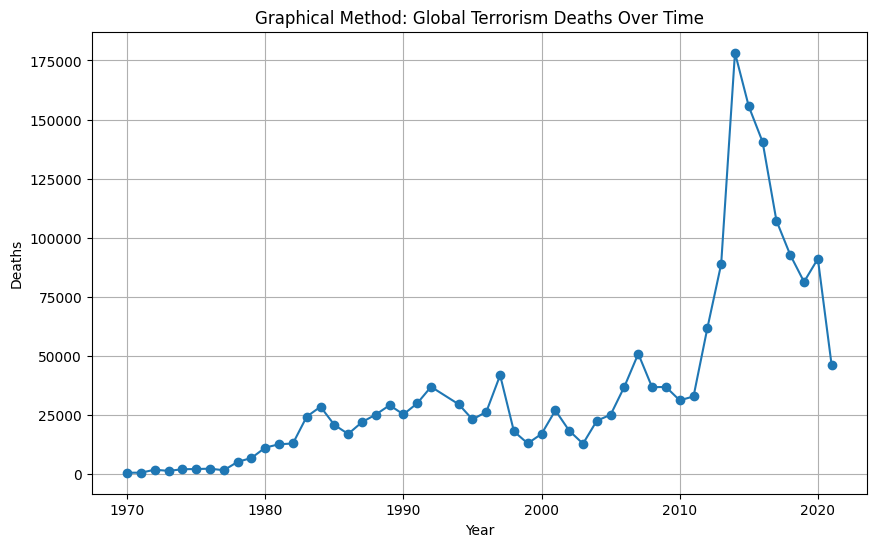

In [5]:
plt.figure(figsize=(10, 6))
plt.plot(global_deaths_per_year["Year"], global_deaths_per_year["Terrorism deaths"], marker='o')
plt.title("Graphical Method: Global Terrorism Deaths Over Time")
plt.xlabel("Year")
plt.ylabel("Deaths")
plt.grid(True)
plt.show()


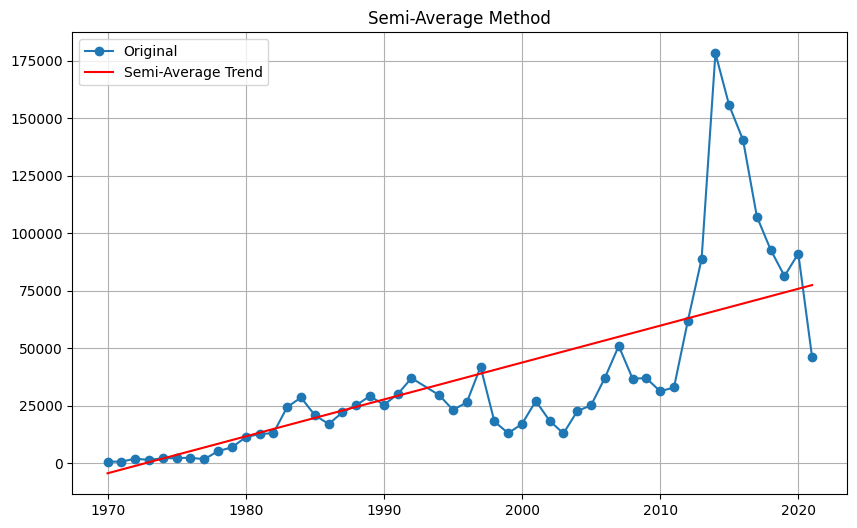

In [6]:
# Split into two halves
n = len(global_deaths_per_year)
first_half = global_deaths_per_year.iloc[:n//2]
second_half = global_deaths_per_year.iloc[n//2:]

# Compute means
mean1 = first_half["Terrorism deaths"].mean()
mean2 = second_half["Terrorism deaths"].mean()
year1 = first_half["Year"].mean()
year2 = second_half["Year"].mean()

# Line equation: y = mx + c
m = (mean2 - mean1) / (year2 - year1)
c = mean1 - m * year1

# Calculate trend values
global_deaths_per_year["Semi_Avg_Trend"] = global_deaths_per_year["Year"] * m + c

# Plot
plt.figure(figsize=(10, 6))
plt.plot(global_deaths_per_year["Year"], global_deaths_per_year["Terrorism deaths"], label="Original", marker='o')
plt.plot(global_deaths_per_year["Year"], global_deaths_per_year["Semi_Avg_Trend"], label="Semi-Average Trend", color='red')
plt.legend()
plt.grid(True)
plt.title("Semi-Average Method")
plt.show()


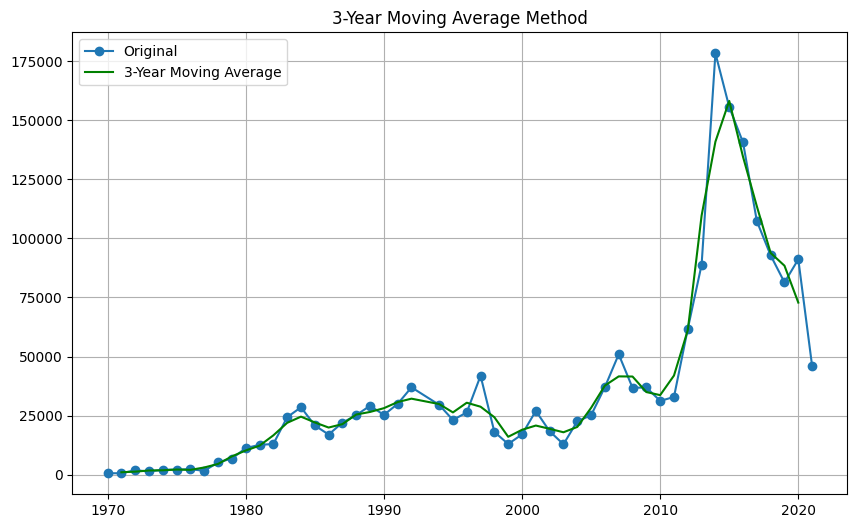

In [7]:
global_deaths_per_year["3yr_MA"] = global_deaths_per_year["Terrorism deaths"].rolling(window=3, center=True).mean()

# Plot
plt.figure(figsize=(10, 6))
plt.plot(global_deaths_per_year["Year"], global_deaths_per_year["Terrorism deaths"], label="Original", marker='o')
plt.plot(global_deaths_per_year["Year"], global_deaths_per_year["3yr_MA"], label="3-Year Moving Average", color='green')
plt.legend()
plt.grid(True)
plt.title("3-Year Moving Average Method")
plt.show()


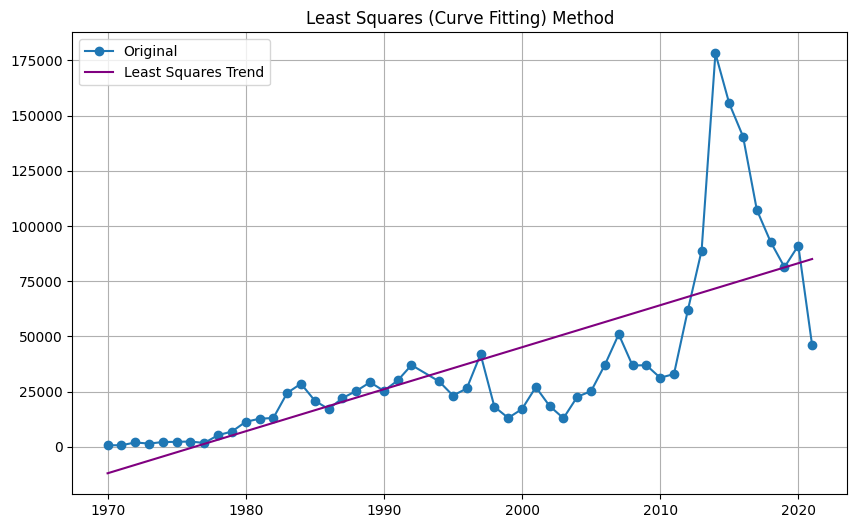

In [8]:
import numpy as np
from sklearn.linear_model import LinearRegression

X = global_deaths_per_year["Year"].values.reshape(-1, 1)
y = global_deaths_per_year["Terrorism deaths"].values

model = LinearRegression()
model.fit(X, y)

# Predict trend values
global_deaths_per_year["Least_Square_Trend"] = model.predict(X)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(global_deaths_per_year["Year"], y, label="Original", marker='o')
plt.plot(global_deaths_per_year["Year"], global_deaths_per_year["Least_Square_Trend"], label="Least Squares Trend", color='purple')
plt.legend()
plt.grid(True)
plt.title("Least Squares (Curve Fitting) Method")
plt.show()
